In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv("CohortDataRaw2/output_real/pat_11/raw_data.csv")
raw_data.head()

,pressure_raw_mmHg,compensated_pressure_raw_mmHg,ax_raw_mps2,ay_raw_mps2,az_raw_mps2,temperature_celsius,pressure_raw_corrected_mmHg,Time,day,timestamp,Compensated Pressure [mmHg],Pressure [mmHg]
0,-9.9,-2.3,6.864655,5.88399,4.412992,32.4,6.530740,2022-12-16 08:58:36.000,2022-12-16,08-58-36,-2.3,-2.3
1,-8.1,-0.5,6.864655,5.88399,4.412992,32.4,8.330155,2022-12-16 08:58:36.004,2022-12-16,08-58-36,-0.5,-0.5
2,-6.2,1.3,6.864655,5.88399,4.412992,32.4,10.229566,2022-12-16 08:58:36.008,2022-12-16,08-58-36,1.3,1.3
3,-5.4,2.1,6.864655,5.88399,4.412992,32.4,11.028973,2022-12-16 08:58:36.012,2022-12-16,08-58-36,2.1,2.1
4,-5.8,1.7,6.864655,5.88399,4.412992,32.4,10.628375,2022-12-16 08:58:36.016,2022-12-16,08-58-36,1.7,1.7


In [37]:
processed_data = pd.read_csv("CohortDataRaw2/output_real/pat_11/waveform_resampled_all_pressure_traces_rv_with_pca.csv")
processed_data.head()

,0,1,2,3,4,5,6,7,8,9,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.624959,-4.173683,-4.545518,-4.767656,-4.900173,-4.975409,-5.019649,-5.047298,-5.059940,-5.053533,...,-0.632573,0.424198,-0.420063,-1.349610,0.507308,-0.551180,1.190886,0.299192,1.037244,-0.068645
1,3.741801,1.754388,0.073655,-1.298746,-2.346533,-3.142303,-3.731824,-4.168292,-4.527663,-4.848574,...,-0.648260,0.646056,0.145189,-0.830423,1.680955,0.779208,0.088413,0.321586,0.825465,0.200517
2,5.632533,3.967092,2.581951,1.476782,0.656862,0.040115,-0.433366,-0.821730,-1.182596,-1.533966,...,-0.381498,-0.091380,-0.151348,-0.340437,1.182242,0.459640,-0.325620,0.224521,1.578477,-0.161096
3,5.748664,4.786027,3.996195,3.343638,2.771172,2.235037,1.715654,1.214805,0.761742,0.405739,...,-0.010738,0.439419,-0.337831,-0.977882,0.773161,0.123399,0.155005,0.575279,1.935571,0.167569
4,9.843265,8.115872,6.634433,5.367311,4.291591,3.366576,2.565492,1.881117,1.318330,0.880636,...,-0.432541,-0.394089,-0.723697,1.091193,0.913636,0.051551,-0.848188,-0.499507,0.909775,1.399631


In [97]:
synthetic_data = pd.read_csv("output_synthetic/output_4096_8_params/waveform_resampled_all_pressure_traces_rv_with_pca.csv")

In [99]:
hi_rpat_data = pd.read_csv("output_synthetic/output_4096_8_params/waveform_resampled_all_pressure_traces_rv.csv")

In [95]:
# read resampled data
resampled_data = pd.read_csv("CohortDataRaw2/output_real/pat_11/waveform_resampled_all_pressure_traces_rv.csv")

# For each row in resampled data, minus the mean of column 0 of that row from all columns in that row
resampled_data_centered = resampled_data.copy()
for i in range(len(resampled_data)):
    resampled_data_centered.iloc[i, :100] = resampled_data.iloc[i, :100] - resampled_data.iloc[i, 0] + resampled_data['0'].mean()
    


KeyboardInterrupt: 

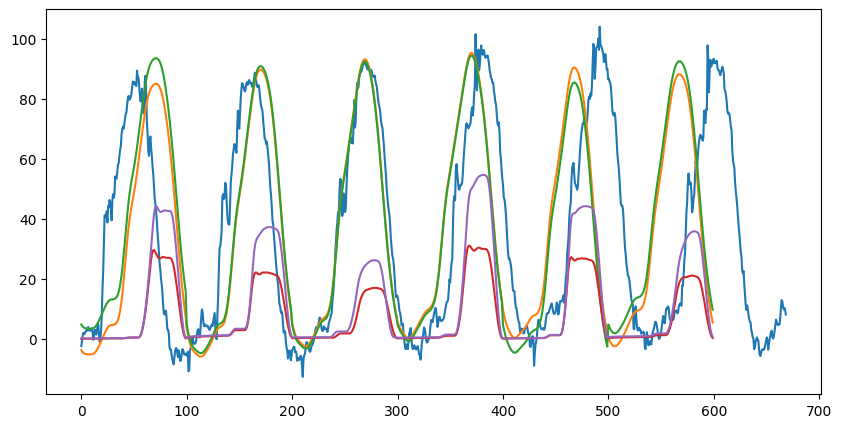

In [100]:
# Plot the first 6 concatnated rows of processed data 100 columns as one line   
data = np.array([])
for i in range(6):
    values = processed_data.iloc[i, :100].values
    data = np.concatenate((data, values))

data_resampled = np.array([])
for i in range(6):
    values = resampled_data_centered.iloc[i, :100].values
    data_resampled = np.concatenate((data_resampled, values))

data_test = np.array([])
for i in range(6):
    values = synthetic_data.iloc[i, :100].values
    data_test = np.concatenate((data_test, values))

data_hi_rpat = np.array([])
for i in range(6):
    values = hi_rpat_data.iloc[i, :100].values
    data_hi_rpat = np.concatenate((data_hi_rpat, values))

time = np.arange(1000) * processed_data['iT'].mean()
# plot the compensated pressure over time for first 1000 time points
plt.figure(figsize=(10, 5))
plt.plot(time, raw_data['Compensated Pressure [mmHg]'][:1000])
plt.plot(data)
plt.plot(data_resampled)
plt.plot(data_test)
plt.plot(data_hi_rpat)
